# Cross-validation


### Definition: 
It is a step in the process of building a machine learning model which helps us ensure that our models fit the data accurately and also ensures that we do not overfit.

In [1]:
#import scikit-learn tree and metrics
from sklearn import tree
from sklearn import metrics
from sklearn import datasets

In [2]:
#Import matplotlib and seaborn
import matplotlib 
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
#This is our global size of label text
#On the plots
matplotlib.rc("xtick",labelsize = 20)
matplotlib.rc("ytick",labelsize = 20)

In [4]:
import pandas as pd
df = pd.read_csv("data/winequality-red.csv", sep=';')

In [5]:
df.head(10)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5
6,7.9,0.60,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4,5
7,7.3,0.65,0.00,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0,7
8,7.8,0.58,0.02,2.0,0.073,9.0,18.0,0.9968,3.36,0.57,9.5,7
9,7.5,0.50,0.36,6.1,0.071,17.0,102.0,0.9978,3.35,0.80,10.5,5


In [6]:
#a mapping dictionary that maps the quality values from0 to 5
quality_mapping = {
    3:0,
    4:1,
    5:2,
    6:3,
    7:4,
    8:5
}

#You can use the map function of pandas with
#any directory to convert the values in a given
#column to values in the directory
df.loc[:,"quality"] = df.quality.map(quality_mapping)

In [7]:
#use sample with frac=1 to shuffle the dataframe
#we reset the indices since they change after
#shuffling the dataframe
df = df.sample(frac = 1).reset_index(drop = True)


#Top 1000 rows are selected for training 
df_train  = df.head(1000)

#bottom 599 values are selected for testing/validation
df_test = df.tail(599)

In [8]:

def accuracy_cal(df_train,df_test,depth):

    """
parameters:
df_train : the data to train the decisionTreeClassifier model

df_test: the data to test the decisionTreeClassifier model

depth: define the depth of the tree.


return :
accuracy of test and training dataset
    """    
    

    #init the model
    clf = tree.DecisionTreeClassifier(max_depth = depth)
    
    #columns/features for training
    #note that, this can be done outside
    #the loop
    cols = [
        "fixed acidity",
        "volatile acidity",
        "citric acid",
        "residual sugar",
        "chlorides",
        "free sulfur dioxide",
        "total sulfur dioxide",
        "density",
        "pH",
        "sulphates",
        "alcohol"
    ]
    
    #fit the model on given features
    clf.fit(df_train[cols], df_train.quality)
    
    #create training and test preditions
    train_predictions = clf.predict(df_train[cols])
    test_predictions = clf.predict(df_test[cols])
    
    #calculate training and test accuracies
    train_accuracy = metrics.accuracy_score(df_train.quality , train_predictions)
    
    test_accuracy = metrics.accuracy_score(df_test.quality, test_predictions)
    
    
        
    return (train_accuracy,test_accuracy)
    
    

In [9]:
#create two plots using matplotlib and seaborn 
def display(train_accuracies, test_accuracies):
    
    """
parameters:

train_accuracies : contain the accuracy of train data using decision tree model.

test_accuracies : contain the accuracy of the test data using decision tree model.

    """    
    
    plt.figure(figsize = (10,5))
    sns.set_style("whitegrid")
    plt.plot(train_accuracies , label = "train accuracy")
    plt.plot(test_accuracies , label = "test accuracy")
    plt.legend(loc = "upper left" , prop = {"size" : 15})
    plt.xticks(range(0,26,5))
    plt.xlabel("max depth",size = 2)
    plt.ylabel("accuracy",size= 20)
    plt.show()

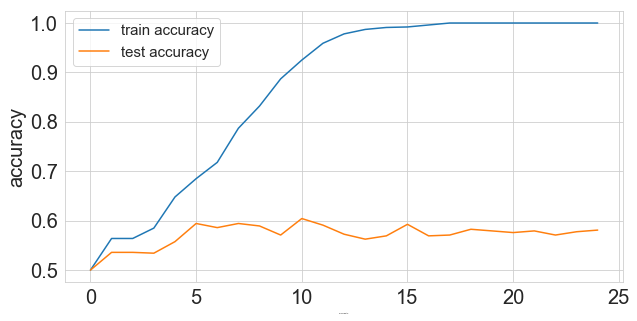

In [10]:
train_accuracies = [0.5]
test_accuracies = [0.5]
for depth in range(1,25):
    
    train_accuracy,test_accuracy = accuracy_cal(df_train,df_test,depth)
    train_accuracies.append(train_accuracy)
    test_accuracies.append(test_accuracy)
    
display(train_accuracies, test_accuracies)
    
    

**The graph we optained shows that test accuracy is not improving although train accuracy is quite good.This is because of overfitting. To prevent this we use cross Validation.** 

### K-fold Cross Validation

In [11]:
#import model_selection module of scikit-learn
from sklearn import model_selection

if __name__ == "__main__" :
    
    
    #we create a new column called kfold and fill it with -1
    df["kfold"] = -1
    
    #the next step is to randomize the rows of the data
    df = df.sample(frac = 1).reset_index(drop = True)
    
    #initiate the kfold class from model_selection module
    kf = model_selection.KFold(n_splits = 5)
    
    #fill the new kfold column
    for fold, (trn_,val_) in enumerate(kf.split(X = df)):
        df.loc[val_,"kfold"]  = fold 
        
    
    #save the new with kfold column
    df.to_csv("train_folds.csv" , index = False)

In [12]:
k_fold_df  = pd.read_csv("train_folds.csv")

In [13]:
k_fold_df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,kfold
0,6.7,0.58,0.08,1.8,0.097,15.0,65.0,0.99590,3.28,0.54,9.2,2,0
1,9.0,0.40,0.43,2.4,0.068,29.0,46.0,0.99430,3.20,0.60,12.2,3,0
2,9.0,0.45,0.49,2.6,0.084,21.0,75.0,0.99870,3.35,0.57,9.7,2,0
3,9.8,0.66,0.39,3.2,0.083,21.0,59.0,0.99890,3.37,0.71,11.5,4,0
4,7.5,0.65,0.18,7.0,0.088,27.0,94.0,0.99915,3.38,0.77,9.4,2,0


In [14]:
import numpy as np

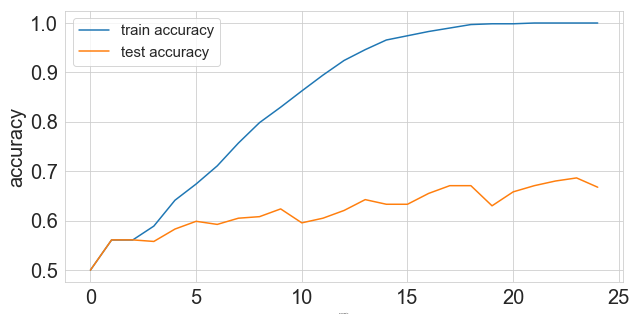

In [15]:
train_accuracies = [0.5]
test_accuracies = [0.5]
for depth in range(1,25):
    
    for i in range(5):
        
        train_sum = []
        test_sum = []
        
        df_test = k_fold_df[k_fold_df["kfold"] == i]
        df_train = k_fold_df[k_fold_df["kfold"] != i]
        
        train_accuracy,test_accuracy = accuracy_cal(df_train,df_test,depth)
        train_sum.append(train_accuracy)
        test_sum.append(test_accuracy)
        
        
    train_accuracies.append(np.mean(train_sum))
    test_accuracies.append(np.mean(test_sum))
     

display(train_accuracies, test_accuracies)

**The above graph obtained after k-fold cross validation.**

Text(0, 0.5, 'count')

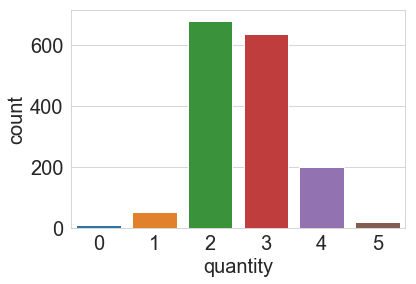

In [16]:
b = sns.countplot(x = "quality",data = df)
b.set_xlabel("quantity",fontsize = 20)
b.set_ylabel("count",fontsize = 20)

**The figure show that the quality of the wine is very much skewed. Some classes have lot of sample but other don't have that many. If we do simple k-fold, we won't have an equal distribution of the targets in every fold. Thus, we chooose stratified k-fold in this case.**

### .Stratifed k-fold 

In [17]:
#import model_selection module of scikit-learn
from sklearn import model_selection

if __name__ == "__main__" :
    
    
    #we create a new column called kfold and fill it with -1
    df["kfold"] = -1
    
    #the next step is to randomize the rows of the data
    df = df.sample(frac = 1).reset_index(drop = True)
    
    #fetch targets 
    y = df.quality.values
    
    #initiate the kfold class from model_selection module
    kf = model_selection.StratifiedKFold(n_splits = 5)
    
    #fill the new kfold column
    for fold, (t_,v_) in enumerate(kf.split(X = df,y = y)):
        df.loc[v_,"kfold"]  = fold 
        
    
    #save the new with kfold column
    df.to_csv("train_sfolds.csv" , index = False)

In [18]:
sk_fold_df  = pd.read_csv("train_sfolds.csv")

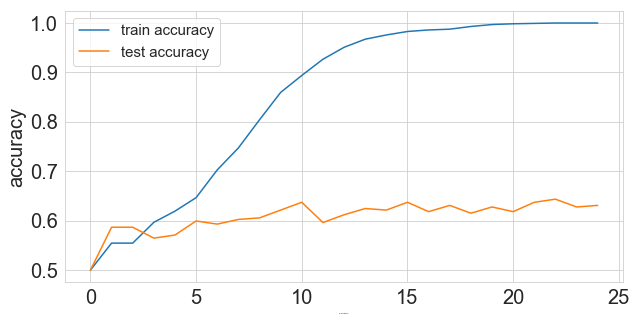

In [19]:
train_accuracies = [0.5]
test_accuracies = [0.5]
for depth in range(1,25):
    
    for i in range(5):
        
        train_sum = []
        test_sum = []
        
        df_test = sk_fold_df[sk_fold_df["kfold"] == i]
        df_train = sk_fold_df[sk_fold_df["kfold"] != i]
        
        train_accuracy,test_accuracy = accuracy_cal(df_train,df_test,depth)
        train_sum.append(train_accuracy)
        test_sum.append(test_accuracy)
        
        
    train_accuracies.append(np.mean(train_sum))
    test_accuracies.append(np.mean(test_sum))
     

display(train_accuracies, test_accuracies)

~The above graph obtain after stratified k-fold cross validation.

**Now we need to follow other feature engineering method to improve test accuracy.**

## Cross validation for Regression model

* We can use all of the cross validation for regression model except for one **Stratified k-fold**. It means we cannot use stratified k-fold directly, but we need to change the problem a bit so that we can use stratfied k-fold .

* Mostly simple k-fold cross-validation works for any regression problem. However, if you see that the distribution of targets is not consistent, you can use stratified k-fold.

* To use stratified k-fold for regression problem, we have to first divide the target into bins , and then we can use stratified k-fold in the same way as classification.

* ways of choosing number of binss:
     *  if you have large number of samples(>10k,>100k) then you don't nedd to care about number of bins. Just divide the data into 10 to 20 bins.
     * But if you don't have a lot of samples, you can use a simple rule like **Sturge's Rule** to calulate the appropriate number of bins.
     
     **Sturge's Rule: Number of bins = 1 + log2(N) $\rightarrow$ where N = total number of samples**

In [20]:
## create a random regression dataset
X, y = datasets.make_regression(n_samples=15000, n_features=100, n_targets=1)

## creating a dataframe
df = pd.DataFrame(X, columns=[f'f_{i}' for i in range(X.shape[1])])

## adding target-labels
df.loc[:, 'target'] = y

## random shuffling the dataset
df = df.sample(frac=1).reset_index(drop=True)
    
## calculating number of bins using Sturge's Rule
num_bins = int(np.floor(1 + np.log2(len(df))))
    
## bin targets
df.loc[:, 'bins'] = pd.cut(x = df['target'], bins=num_bins, labels=False)

Text(0, 0.5, 'count')

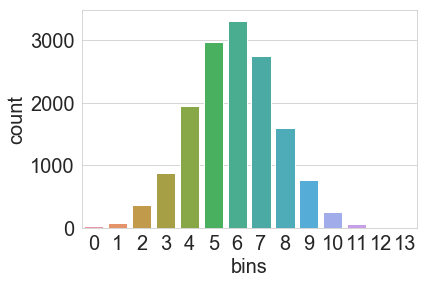

In [21]:
#Creating the count plot for the bins
b = sns.countplot(x = "bins",data = df)
b.set_xlabel("bins",fontsize = 20)
b.set_ylabel("count",fontsize = 20)

**The figure show that the data is very much skewed. Some classes have lot of sample but other don't have that many. If we do simple k-fold, we won't have an equal distribution of the targets in every fold. Thus, we chooose stratified k-fold in this case.**

In [22]:
## create a new column for storing fold number and fill it with -1
df['kfold'] = -1
  
## To randomzie row of data 
df = df.sample(frac=1).reset_index(drop=True)

    
## initiate stratified kfold class from model_selection
kf = model_selection.StratifiedKFold(n_splits=4, shuffle=False)
    
## filling the fold values, Note: instead of target values we use bin values
for fold, (train_idx, valid_idx) in enumerate(kf.split(X=df, y=df['bins'].values)):
    df.loc[valid_idx, 'kfold'] = fold
    
    
## drop the bins column
df.drop('bins', axis=1, inplace=True)
        

C:\Users\lenovo\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:652: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=4.
  % (min_groups, self.n_splits)), Warning)


In [23]:
#Final data is
df.head(10)

,f_0,f_1,f_2,f_3,f_4,f_5,f_6,f_7,f_8,f_9,...,f_92,f_93,f_94,f_95,f_96,f_97,f_98,f_99,target,kfold
0,0.752914,-0.481160,-0.904758,1.099244,0.712160,0.529788,-0.671488,1.994969,-0.662256,-2.101274,...,0.682038,0.312966,-0.850925,0.566892,-0.193969,2.810625,-0.085929,0.484212,145.802932,0
1,-1.205134,0.022637,0.827983,1.123261,-0.789966,0.938766,-1.190363,0.471380,-1.420750,1.098932,...,0.226504,-1.952444,-2.327281,-0.881695,-0.676060,-0.267487,0.198928,-0.085507,-261.528870,0
2,0.773617,-0.241553,0.421778,1.178974,-1.622738,0.304839,-0.542514,-0.544204,0.587453,1.081701,...,-0.132101,0.826254,0.552975,-0.807531,0.658618,-1.184073,0.997132,1.238297,128.120498,0
3,0.847796,0.242403,-0.860212,1.729197,0.119025,-1.013905,-0.171737,0.491230,-0.964696,1.026340,...,-0.582428,-0.811024,-1.147149,0.743538,1.104965,0.367081,-0.084941,1.984509,227.799612,0
4,-0.341935,-0.536788,-0.253877,-0.383452,-0.098842,-0.635651,-0.230077,-2.026197,-0.757808,-0.435090,...,0.261260,-0.995150,-0.002024,0.553282,-1.419385,-1.008303,-0.659932,1.676779,-348.299704,0
5,-0.872995,-1.794100,-1.037695,0.507740,0.243308,0.659610,1.970802,0.053920,-0.926526,0.219668,...,-0.924178,0.912905,1.460303,0.733955,0.934824,0.048215,-0.586971,-1.229908,-40.492350,0
6,0.134897,-0.011695,-0.484694,-1.614024,-0.069923,1.176839,0.834973,1.033173,1.321195,0.237418,...,1.206774,0.929878,-0.326445,1.228020,0.866596,-1.240002,1.304379,-0.858429,165.682076,0
7,-0.660129,-0.211873,1.063243,-0.073812,0.396887,-0.454389,0.639823,-1.347588,-0.489660,-0.242361,...,0.845829,-0.469874,-1.844828,-1.548025,0.539546,2.060603,-2.183238,-2.047627,-98.144952,0
8,0.930230,1.511631,2.076268,-1.419452,-1.315426,-2.441041,0.157527,-0.610561,0.035426,-0.831954,...,-1.391957,-1.223369,1.206651,-0.835965,-0.613058,-2.136747,0.205461,0.578697,66.249117,0
9,0.380560,0.067739,-0.448676,0.246718,0.087001,0.929456,-0.653539,-0.270747,-2.409866,-1.413243,...,1.411911,0.387740,-0.891053,0.707870,-0.354031,0.522249,1.147192,0.058348,-291.618430,0


### End notes:
* Cross validation is the first and most essential step when it comes to building machine learning models.

* If you have a good cross-validation scheme in which validation data is representative of training and real world data, you'll be able to build a good machine learning model which is highly generalizable.

* Keep in mind that cross-validation also depends a lot on the data and you might need to adopt new forms of cross-validation depending on your problem and data at hand.

ShubhangiDabral13...